<a href="https://colab.research.google.com/github/Lee-Gunju/AI-paper-code-review-for-personal-project/blob/master/%5B%EB%AC%B8%EC%A0%9C%5D_seq2seq%EB%AA%A8%EB%8D%B8%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%B1%97%EB%B4%87_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seq2Seq 모델을 활용한 챗봇 생성

## STEP 1. Seq2Seq 모델의 개요

### 문제 01. seq2seq 모델의 구조에 대한 이해

- encoder & decoder 구조
- 데이터 셋의 구성
- context vector

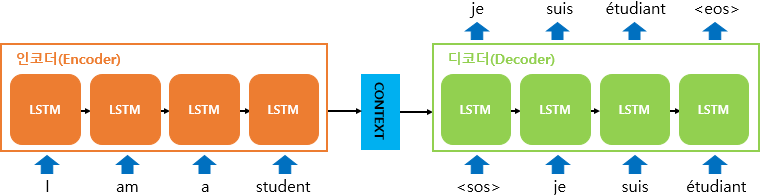

In [ ]:
from IPython.display import Image

Image('https://wikidocs.net/images/page/24996/%EC%9D%B8%EC%BD%94%EB%8D%94%EB%94%94%EC%BD%94%EB%8D%94%EB%AA%A8%EB%8D%B8.PNG')

### 문제 02. 데이터셋에 필요한 라이브러리를 다운로드 받습니다.

`Korpora`는 한글 자연어처리 데이터)셋입니다.

- [깃헙 주소 링크](https://github.com/ko-nlp/Korpora)
- [공식 도큐먼트](https://pypi.org/project/Korpora/)

설치 명령어

In [ ]:
!pip install Korpora

- 이 중 챗봇용 데이터셋인 `KoreanChatbotKorpus`를 다운로드 받습니다.
- `KoreanChatbotKorpus` 데이터셋을 활용하여 챗봇 모델을 학습합니다.
- text, pair로 구성되어 있습니다.
- 질의는 **text**, 답변은 **pair**입니다.

### 문제 03. Korpora의 챗봇 데이터를 import 합니다.

In [ ]:
from Korpora import KoreanChatbotKorpus

# 코드를 입력하세요
corpus = KoreanChatbotKorpus()


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : songys@github
    Repository : https://github.com/songys/Chatbot_data
    References :

    Chatbot_data_for_Korean v1.0
      1. 챗봇 트레이닝용 문답 페어 11,876개
      2. 일상다반사 0, 이별(부정) 1, 사랑(긍정) 2로 레이블링
    자세한 내용은 위의 repository를 참고하세요.

    # License
    CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
    Details in https://creativecommons.org/publicdomain/zero/1.0/

[Korpora] Corpus `korean_chatbot_data` is already installed at /root/Korpora/korean_chatbot_data/ChatbotData.csv


예시 텍스트를 보면 구어체로 구성되어 있습니다.

In [ ]:
corpus.get_all_pairs()

('하루가 또 가네요.',
 '위로해 드립니다.',
 '여행은 언제나 좋죠.',
 '여행은 언제나 좋죠.',
 '눈살이 찌푸려지죠.',
 '다시 새로 사는 게 마음 편해요.',
 '다시 새로 사는 게 마음 편해요.',
 '잘 모르고 있을 수도 있어요.',
 '시간을 정하고 해보세요.',
 '시간을 정하고 해보세요.',
 '자랑하는 자리니까요.',
 '그 사람도 그럴 거예요.',
 '그 사람도 그럴 거예요.',
 '혼자를 즐기세요.',
 '돈은 다시 들어올 거예요.',
 '땀을 식혀주세요.',
 '어서 잊고 새출발 하세요.',
 '빨리 집에 돌아가서 끄고 나오세요.',
 '빨리 집에 돌아가서 끄고 나오세요.',
 '다음 달에는 더 절약해봐요.',
 '따뜻하게 사세요!',
 '다음 달에는 더 절약해봐요.',
 '가장 확실한 시간은 오늘이에요. 어제와 내일을 놓고 고민하느라 시간을 낭비하지 마세요.',
 '온 가족이 모두 마음에 드는 곳으로 가보세요.',
 '온 가족이 모두 마음에 드는 곳으로 가보세요.',
 '온 가족이 모두 마음에 드는 곳으로 가보세요.',
 '저를 만들어 준 사람을 부모님, 저랑 이야기해 주는 사람을 친구로 생각하고 있어요',
 '저를 만들어 준 사람을 부모님, 저랑 이야기해 주는 사람을 친구로 생각하고 있어요',
 '더 가까워질 기회가 되겠네요.',
 '저도요.',
 '다들 바빠서 이야기할 시간이 부족했나봐요.',
 '다들 바빠서 이야기할 시간이 부족했나봐요.',
 '온 가족이 모두 마음에 드는 곳으로 가보세요.',
 '좋은 생각이에요.',
 '더 가까워질 기회가 되겠네요.',
 '저를 만들어 준 사람을 부모님, 저랑 이야기해 주는 사람을 친구로 생각하고 있어요',
 '좋은 생각이에요.',
 '정말 후회할 습관이에요.',
 '무모한 결정을 내리지 마세요.',
 '선생님이나 기관에 연락해보세요.',
 '떨리는 감정은 그 자체로 소중해요.',
 '득템했길 바라요.',
 '휴식도 필요하죠.',
 '단짠으로 두 개 사는게 진리죠.',
 '단짠으로 두

In [ ]:
corpus.get_all_texts()

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨',
 'SNS보면 나만 빼고 다 행복해보여',
 '가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다.',
 '가스비 비싼데 감기 걸리겠어',
 '가스비 장난 아님',
 '가장 확실한 건 뭘까?',
 '가족 여행 가기로 했어',
 '가족 여행 고고',
 '가족 여행 어디로 가지?',
 '가족 있어?',
 '가족관계 알려 줘',
 '가족끼리 여행간다.',
 '가족들 보고 싶어',
 '가족들이랑 서먹해',
 '가족들이랑 서먹해졌어',
 '가족들이랑 어디 가지?',
 '가족들이랑 여행 갈거야',
 '가족여행 가야지',
 '가족이 누구야?',
 '가족이랑 여행 가려고',
 '가족한테 스트레스 풀었어',
 '가출할까?',
 '가출해도 갈 데가 없어',
 '간만에 떨리니까 좋더라',
 '간만에 쇼핑 중',
 '간만에 휴식 중',
 '간식 뭐 먹을까',
 '간식 추천',
 '간장치킨 시켜야지',
 '간접흡연 싫어',
 '갈까 말까 고민 돼',
 '갈까 말까?',
 '감 말랭이 먹고 싶다.',
 '감 말랭이 먹어야지',
 '감기 같애',
 '감기 걸린 것 같아',
 '감기 기운이 있어',
 '감기 들 거 같애',
 '감기가 오려나',
 '감기약이 없어',
 '감기인거 같애',
 '감미로운 목소리 좋아',
 '감정이 쓰레기통처럼 엉망진창이야',
 '감정컨트롤을 못하겠어',
 '감정컨트롤이 안돼',
 '감히 나를 무시하는 애가 있어',
 '갑자기 나쁜 생각이 막 들더라',
 '갑자기 눈물 나',

In [ ]:
corpus.get_all_texts()[:10]

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨']

데이터셋 확인

In [ ]:
corpus.get_all_texts()[:5]

['12시 땡!', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네']

In [ ]:
corpus.get_all_pairs()[:5]

('하루가 또 가네요.', '위로해 드립니다.', '여행은 언제나 좋죠.', '여행은 언제나 좋죠.', '눈살이 찌푸려지죠.')

## STEP 2. 데이터 전처리

### 문제 04. quenstion 데이터셋과 answer 데이터셋 분리

**question**과 **answer**를 분리합니다.

**question**은 질의로 활용될 데이터셋, **answer**는 답변으로 활용될 데이터 셋입니다.

In [ ]:
texts = []
pairs = []

# 코드를 입력하세요
for text, pair in zip(corpus.get_all_texts(), corpus.get_all_pairs()):
    texts.append(text)
    pairs.append(pair)

In [ ]:
texts

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨',
 'SNS보면 나만 빼고 다 행복해보여',
 '가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다.',
 '가스비 비싼데 감기 걸리겠어',
 '가스비 장난 아님',
 '가장 확실한 건 뭘까?',
 '가족 여행 가기로 했어',
 '가족 여행 고고',
 '가족 여행 어디로 가지?',
 '가족 있어?',
 '가족관계 알려 줘',
 '가족끼리 여행간다.',
 '가족들 보고 싶어',
 '가족들이랑 서먹해',
 '가족들이랑 서먹해졌어',
 '가족들이랑 어디 가지?',
 '가족들이랑 여행 갈거야',
 '가족여행 가야지',
 '가족이 누구야?',
 '가족이랑 여행 가려고',
 '가족한테 스트레스 풀었어',
 '가출할까?',
 '가출해도 갈 데가 없어',
 '간만에 떨리니까 좋더라',
 '간만에 쇼핑 중',
 '간만에 휴식 중',
 '간식 뭐 먹을까',
 '간식 추천',
 '간장치킨 시켜야지',
 '간접흡연 싫어',
 '갈까 말까 고민 돼',
 '갈까 말까?',
 '감 말랭이 먹고 싶다.',
 '감 말랭이 먹어야지',
 '감기 같애',
 '감기 걸린 것 같아',
 '감기 기운이 있어',
 '감기 들 거 같애',
 '감기가 오려나',
 '감기약이 없어',
 '감기인거 같애',
 '감미로운 목소리 좋아',
 '감정이 쓰레기통처럼 엉망진창이야',
 '감정컨트롤을 못하겠어',
 '감정컨트롤이 안돼',
 '감히 나를 무시하는 애가 있어',
 '갑자기 나쁜 생각이 막 들더라',
 '갑자기 눈물 나',

In [ ]:
list(zip(texts, pairs))[:5]

[('12시 땡!', '하루가 또 가네요.'),
 ('1지망 학교 떨어졌어', '위로해 드립니다.'),
 ('3박4일 놀러가고 싶다', '여행은 언제나 좋죠.'),
 ('3박4일 정도 놀러가고 싶다', '여행은 언제나 좋죠.'),
 ('PPL 심하네', '눈살이 찌푸려지죠.')]

### 문제 05. 특수문자는 제거합니다.

**한글과 숫자를 제외한 특수문자를 제거**하도록 합니다.


[참고] 튜토리얼에서는 특수문자와 영문자를 제거하나, 실제 프로젝트에 적용해보기 위해서는 신중히 결정해야합니다

*챗봇 대화에서 영어도 많이 사용되고, 특수문자도 굉장히 많이 사용됩니다. 따라서, 선택적으로 제거할 특수기호나 영문자를 정의한 후에 전처리를 진행하야합니다.*

In [ ]:
# re 모듈은 regex expression을 적용하기 위하여 활용합니다.
import re

In [ ]:
def clean_sentence(sentence):
    # 한글, 숫자를 제외한 모든 문자는 제거합니다.
    # 코드를 입력하세요
    sentence = re.sub(r'[^0-9ㄱ-ㅎㅏ-ㅣ가-힣 ]',r'', sentence)
    return sentence

**적용한 예시**

한글, 숫자 이외의 모든 문자를 전부 제거됨을 확인할 수 있습니다.

In [ ]:
clean_sentence('12시 땡^^!??')

'12시 땡'

In [ ]:
clean_sentence('abcef가나다^^$%@12시 땡^^!??')

'가나다12시 땡'

### 문제 06. 한글 형태소 분석기 (Konlpy)

형태소 분석기를 활용하여 문장을 분리합니다.

```가방에 들어가신다 -> 가방/NNG + 에/JKM + 들어가/VV + 시/EPH + ㄴ다/EFN```

- **형태소 분석** 이란 형태소를 비롯하여, 어근, 접두사/접미사, 품사(POS, part-of-speech) 등 다양한 언어적 속성의 구조를 파악하는 것입니다.
- **konlpy 형태소 분석기를 활용**하여 한글 문장에 대한 토큰화처리를 보다 효율적으로 처리합니다.



[공식 도큐먼트](https://konlpy-ko.readthedocs.io/ko/v0.4.3/morph/)

**설치**

In [ ]:
!pip install konlpy

konlpy 내부에는 Kkma, Okt, Twitter 등등의 형태소 분석기가 존재하지만, 이번 튜토리얼에서는 Okt를 활용하도록 하겠습니다.

In [ ]:
from konlpy.tag import Okt

In [ ]:
# Okt 토크나이저 객체를 생성합니다.
# 코드를 입력하세요
okt = Okt()

In [ ]:
# 형태소 변환에 활용하는 함수
# morphs 함수 안에 변환한 한글 문장을 입력 합니다.
def process_morph(sentence):
    # 코드를 입력 하세요
    return ' '.join(okt.morphs(sentence))

In [ ]:
process_morph('한글은 홀소리와 닿소리 모두 소리틀을 본떠 만든 음소문자[1]로 한글 맞춤법에서는 닿소리 14개와 홀소리 10개, 모두 24개를 표준으로 삼는다. "나랏말이 중국과 달라" 문제를 느낀 조선의 세종대왕이 한국어는 물론 이웃나라 말까지 나타내도록 1443년 창제하여 1446년 반포하였다. ')

'한글 은 홀소리 와 닿소리 모두 소 리틀 을 본떠 만든 음소문자 [ 1 ] 로 한글 맞춤법 에서는 닿소리 14 개 와 홀소리 10 개 , 모두 24 개 를 표준 으로 삼는다 . " 나랏말 이 중국 과 달라 " 문제 를 느낀 조선 의 세종대왕 이 한국어 는 물론 이웃 나라 말 까지 나타내도록 1443년 창제 하여 1446년 반포 하였다 .'

## STEP 3. 데이터셋 구성

### 문제 07. Seq2Seq 학습을 위한 데이터셋 구성

**Seq2Seq** 모델이 학습하기 위한 데이터셋을 구성할 때, 다음과 같이 **3가지 데이터셋**을 구성합니다.

- `question`: encoder input 데이터셋 (질의 전체)
- `answer_input`: decoder input 데이터셋 (답변의 시작). START 토큰을 문장 처음에 추가 합니다.
- `answer_output`: decoder output 데이터셋 (답변의 끝). END 토큰을 문장 마지막에 추가 합니다.

In [ ]:
def clean_and_morph(sentence, is_question=True):
    # 한글 문장 전처리
    # 코드를 입력하세요
    sentence = clean_sentence(sentence)
    # 형태소 변환
    # 코드를 입력하세요
    sentence = process_morph(sentence)
    # Question 인 경우, Answer인 경우를 분기하여 처리합니다.
    # 코드를 입력하세요
    if is_question:
        return sentence
    else:
        # START 토큰은 decoder input에 END 토큰은 decoder output에 추가합니다.
        # 코드를 입력하세요
        return ('<START> ' + sentence, sentence + ' <END>')

### 문제 08. preprocess 함수에서는 `text`와 `pair`에 대한 데이터 셋 구성을 진행합니다.

In [ ]:
def preprocess(texts, pairs):
    questions = []
    answer_in = []
    answer_out = []

    # 질의에 대한 전처리
    for text in texts:
        # 전처리와 morph 수행
        # 코드를 입력하세요
        question = clean_and_morph(text, is_question=True)
        questions.append(question)

    # 답변에 대한 전처리
    for pair in pairs:
        # 전처리와 morph 수행
        # 코드를 입력하세요
        in_, out_ = clean_and_morph(pair, is_question=False)
        answer_in.append(in_)
        answer_out.append(out_)
    
    return questions, answer_in, answer_out

In [ ]:
questions, answer_in, answer_out = preprocess(texts, pairs)

In [ ]:
# Ram 용량이 초과되었을 경우!!!! 
texts = texts[:1000]
pairs = pairs[:1000]

questions, answer_in, answer_out = preprocess(texts, pairs)

In [ ]:
questions[:5]

['12시 땡', '1 지망 학교 떨어졌어', '3 박 4일 놀러 가고 싶다', '3 박 4일 정도 놀러 가고 싶다', '심하네']

In [ ]:
answer_in[:5]

['<START> 하루 가 또 가네요',
 '<START> 위로 해 드립니다',
 '<START> 여행 은 언제나 좋죠',
 '<START> 여행 은 언제나 좋죠',
 '<START> 눈살 이 찌푸려지죠']

In [ ]:
answer_out[:5]

['하루 가 또 가네요 <END>',
 '위로 해 드립니다 <END>',
 '여행 은 언제나 좋죠 <END>',
 '여행 은 언제나 좋죠 <END>',
 '눈살 이 찌푸려지죠 <END>']

### 문제 09. `all_sentences` 변수에 모든 데이터셋 문장을 합칩니다.

합치는 이유는 모든 문장을 합쳐서 토큰화를 진행하기 위함입니다.

In [ ]:
# 코드를 입력하세요
all_sentences = questions + answer_in + answer_out

In [ ]:
# 코드를 입력하세요
a = (' '.join(questions) + ' '.join(answer_in) + ' '.join(answer_out)).split()
len(set(a))

2300

In [ ]:
a

['12시',
 '땡',
 '1',
 '지망',
 '학교',
 '떨어졌어',
 '3',
 '박',
 '4일',
 '놀러',
 '가고',
 '싶다',
 '3',
 '박',
 '4일',
 '정도',
 '놀러',
 '가고',
 '싶다',
 '심하네',
 '카드',
 '망가졌어',
 '카드',
 '안',
 '돼',
 '맞팔',
 '왜',
 '안',
 '하지',
 'ㅠㅠ',
 '시간',
 '낭비',
 '인',
 '거',
 '아는데',
 '매일',
 '하는',
 '중',
 '시간',
 '낭비',
 '인데',
 '자꾸',
 '보게',
 '됨',
 '보면',
 '나',
 '만',
 '빼고',
 '다',
 '행복',
 '해보여',
 '가끔',
 '궁금해',
 '가끔',
 '뭐',
 '하는지',
 '궁금해',
 '가끔',
 '은',
 '혼자',
 '인게',
 '좋다',
 '가난한',
 '자의',
 '설움',
 '가만',
 '있어도',
 '땀',
 '난다',
 '가상',
 '화폐',
 '쫄딱',
 '망함',
 '가스',
 '불',
 '켜고',
 '나갔어',
 '가스',
 '불',
 '켜놓고',
 '나온거',
 '같아',
 '가스',
 '비',
 '너무',
 '많이',
 '나왔다',
 '가스',
 '비',
 '비싼데',
 '감기',
 '걸리겠어',
 '가스',
 '비',
 '장난',
 '아님',
 '가장',
 '확실한',
 '건',
 '뭘',
 '까',
 '가족',
 '여행',
 '가기',
 '로',
 '했어',
 '가족',
 '여행',
 '고고',
 '가족',
 '여행',
 '어디',
 '로',
 '가지',
 '가족',
 '있어',
 '가족',
 '관계',
 '알려',
 '줘',
 '가족',
 '끼리',
 '여행',
 '간다',
 '가족',
 '들',
 '보고',
 '싶어',
 '가족',
 '들',
 '이랑',
 '서먹해',
 '가족',
 '들',
 '이랑',
 '서먹해졌어',
 '가족',
 '들',
 '이랑',
 '어디',
 '가지',
 '가족',
 '들',
 '이랑',
 '여

## STEP 4. 토큰화 (Tokenizer)

In [ ]:
import numpy as np
import warnings
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# WARNING 무시
warnings.filterwarnings('ignore')

### 문제 10. 토근의 option을 정의 합니다.

- filter는 ''로 지정합니다. 
- lower는 False로 지정합니다.
- oov_token은 '<OOV>'로 지정합니다.

**토큰의 정의**

In [ ]:
# 코드를 입력하세요
tokenizer = Tokenizer(filters='', lower=False, oov_token='<OOV>')

In [ ]:
tokenizer

### 문제 11. 단어 사전을 만듭니다.

**Tokenizer**로 문장에 대한 Word-Index Vocabulary(단어 사전)을 만듭니다.

In [ ]:
# 코드를 입력하세요
tokenizer.fit_on_texts(all_sentences)

**단어 사전 10개 출력**

In [ ]:
for word, idx in tokenizer.word_index.items():
    print(f'{word}\t\t => \t{idx}')
    if idx > 10:
        break

<OOV>		 => 	1
<START>		 => 	2
<END>		 => 	3
이		 => 	4
거		 => 	5
을		 => 	6
가		 => 	7
나		 => 	8
예요		 => 	9
사람		 => 	10
요		 => 	11


In [ ]:
tokenizer.word_counts

OrderedDict([('12시', 1),
             ('땡', 1),
             ('1', 3),
             ('지망', 1),
             ('학교', 1),
             ('떨어졌어', 2),
             ('3', 4),
             ('박', 2),
             ('4일', 2),
             ('놀러', 3),
             ('가고', 10),
             ('싶다', 15),
             ('정도', 2),
             ('심하네', 1),
             ('카드', 2),
             ('망가졌어', 1),
             ('안', 68),
             ('돼', 22),
             ('맞팔', 1),
             ('왜', 25),
             ('하지', 48),
             ('ㅠㅠ', 2),
             ('시간', 53),
             ('낭비', 2),
             ('인', 43),
             ('거', 262),
             ('아는데', 1),
             ('매일', 3),
             ('하는', 66),
             ('중', 6),
             ('인데', 13),
             ('자꾸', 7),
             ('보게', 1),
             ('됨', 1),
             ('보면', 7),
             ('나', 217),
             ('만', 50),
             ('빼고', 3),
             ('다', 37),
             ('행복', 6),
             ('해보여', 2),
      

In [ ]:
tokenizer.index_word

{1: '<OOV>',
 2: '<START>',
 3: '<END>',
 4: '이',
 5: '거',
 6: '을',
 7: '가',
 8: '나',
 9: '예요',
 10: '사람',
 11: '요',
 12: '도',
 13: '해보세요',
 14: '잘',
 15: '에',
 16: '를',
 17: '내',
 18: '는',
 19: '은',
 20: '너무',
 21: '저',
 22: '하세요',
 23: '마세요',
 24: '보세요',
 25: '수',
 26: '하고',
 27: '더',
 28: '것',
 29: '생각',
 30: '봐요',
 31: '안',
 32: '할',
 33: '이에요',
 34: '하는',
 35: '게',
 36: '해',
 37: '있을',
 38: '많이',
 39: '같아',
 40: '마음',
 41: '의',
 42: '때',
 43: '말',
 44: '있어요',
 45: '좋은',
 46: '시간',
 47: '못',
 48: '만',
 49: '들',
 50: '친구',
 51: '하지',
 52: '자신',
 53: '같아요',
 54: '한',
 55: '인',
 56: '적',
 57: '공부',
 58: '하면',
 59: '제',
 60: '좀',
 61: '해주세요',
 62: '으로',
 63: '싶어',
 64: '네',
 65: '다',
 66: '남자친구',
 67: '고',
 68: '일',
 69: '같이',
 70: '있는',
 71: '선물',
 72: '죠',
 73: '그',
 74: '내일',
 75: '다른',
 76: '지금',
 77: '이야기',
 78: '고민',
 79: '준비',
 80: '보다',
 81: '바라요',
 82: '드세요',
 83: '이네',
 84: '로',
 85: '있어',
 86: '좋죠',
 87: '가보세요',
 88: '당신',
 89: '될',
 90: '왜',
 91: '가족',
 92: '한테',
 93: '그런',

### 문제 12. 토큰의 갯수 지정

**토큰의 갯수 확인**

In [ ]:
len(tokenizer.word_index)
# VOCAB_SIZE 변수에 토큰의 단어 사전의 갯수를 입력합니다.
# 코드를 입력하세요
VOCAB_SIZE = len(tokenizer.word_index) + 1

In [ ]:
VOCAB_SIZE

2301

### 문제 13. 치환: 텍스트를 시퀀스로 인코딩 (`texts_to_sequences`)

In [ ]:
# 코드를 입력하세요
question_sequence = tokenizer.texts_to_sequences(questions)
answer_in_sequence = tokenizer.texts_to_sequences(answer_in)
answer_out_sequence = tokenizer.texts_to_sequences(answer_out)

In [ ]:
questions

['12시 땡',
 '1 지망 학교 떨어졌어',
 '3 박 4일 놀러 가고 싶다',
 '3 박 4일 정도 놀러 가고 싶다',
 '심하네',
 '카드 망가졌어',
 '카드 안 돼',
 '맞팔 왜 안 하지 ㅠㅠ',
 '시간 낭비 인 거 아는데 매일 하는 중',
 '시간 낭비 인데 자꾸 보게 됨',
 '보면 나 만 빼고 다 행복 해보여',
 '가끔 궁금해',
 '가끔 뭐 하는지 궁금해',
 '가끔 은 혼자 인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀 난다',
 '가상 화폐 쫄딱 망함',
 '가스 불 켜고 나갔어',
 '가스 불 켜놓고 나온거 같아',
 '가스 비 너무 많이 나왔다',
 '가스 비 비싼데 감기 걸리겠어',
 '가스 비 장난 아님',
 '가장 확실한 건 뭘 까',
 '가족 여행 가기 로 했어',
 '가족 여행 고고',
 '가족 여행 어디 로 가지',
 '가족 있어',
 '가족 관계 알려 줘',
 '가족 끼리 여행 간다',
 '가족 들 보고 싶어',
 '가족 들 이랑 서먹해',
 '가족 들 이랑 서먹해졌어',
 '가족 들 이랑 어디 가지',
 '가족 들 이랑 여행 갈거야',
 '가족 여행 가야 지',
 '가족 이 누구 야',
 '가족 이랑 여행 가려고',
 '가족 한테 스트레스 풀었어',
 '가출 할까',
 '가출 해도 갈 데 가 없어',
 '간만 에 떨리니까 좋더라',
 '간만 에 쇼핑 중',
 '간만 에 휴식 중',
 '간식 뭐 먹을까',
 '간식 추천',
 '간장 치킨 시켜야지',
 '간접흡연 싫어',
 '갈까 말까 고민 돼',
 '갈까 말까',
 '감 말랭이 먹고 싶다',
 '감 말랭이 먹어야지',
 '감기 같 애',
 '감기 걸린 것 같아',
 '감기 기운 이 있어',
 '감기 들 거 같 애',
 '감기 가 오려나',
 '감기 약 이 없어',
 '감기 인거 같 애',
 '감미로운 목소리 좋아',
 '감정 이 쓰레기통 처럼 엉망 진창 이야',
 '감정 컨트롤 을 못 하겠어',
 '감정 컨트롤 이 안 돼',
 '감히 나를 무시 하는 애

### 문제 14. 문장의 길이 맞추기 (`pad_sequences`)

`pad_sequences`를 활용하여 문장의 길이를 맞춰 줍니다.

In [ ]:
# 최대 문자의 토큰 갯수는 30개로 지정합니다.
MAX_LENGTH = 30
TRUNCATING = 'post'
PADDING = 'post'

In [ ]:
question_sequence[0]

[1608, 1609]

In [ ]:
# 코드를 입력 하세요
question_padded = pad_sequences(question_sequence, maxlen=MAX_LENGTH, truncating=TRUNCATING, padding=PADDING)
answer_in_padded = pad_sequences(answer_in_sequence, maxlen=MAX_LENGTH, truncating=TRUNCATING, padding=PADDING)
answer_out_padded = pad_sequences(answer_out_sequence, maxlen=MAX_LENGTH, truncating=TRUNCATING, padding=PADDING)

변환된 데이터 셋의 shape를 확인합니다.

In [ ]:
question_padded.shape

(1000, 30)

In [ ]:
answer_in_padded.shape, answer_out_padded.shape

((1000, 30), (1000, 30))

## STEP 5. 데이터셋 변환 함수 정의

### 문제 15. 단어별 원핫인코딩 적용

단어별 원핫인코딩을 적용하는 이유는 decoder의 output(출력)을 원핫인코딩 vector로 변환하기 위함

In [ ]:
answer_in_padded

array([[  2, 391,   7, ...,   0,   0,   0],
       [  2, 143,  36, ...,   0,   0,   0],
       [  2, 106,  19, ...,   0,   0,   0],
       ...,
       [  2,  21,  12, ...,   0,   0,   0],
       [  2, 624,  46, ...,   0,   0,   0],
       [  2, 740, 249, ...,   0,   0,   0]], dtype=int32)

In [ ]:
def convert_to_one_hot(padded):
    # 원핫인코딩 초기화
    one_hot_vector = np.zeros((len(padded), MAX_LENGTH, VOCAB_SIZE))

    # 디코더 목표를 원핫인코딩으로 변환
    # 학습시 입력은 인덱스이지만, 출력은 원핫인코딩 형식임
    for i, sequence in enumerate(padded):
        for j, index in enumerate(sequence):
            one_hot_vector[i, j, index] = 1

    return one_hot_vector

In [ ]:
# RAM 용량이 초과하는 경우 세션이 다운될 수 있습니다.
# 그럴때는 학습 세트의 전체 사이즈를 줄여주세요.
answer_in_one_hot = convert_to_one_hot(answer_in_padded)
answer_out_one_hot = convert_to_one_hot(answer_out_padded)

In [ ]:
answer_in_one_hot[0].shape, answer_in_one_hot[0].shape

((30, 2301), (30, 2301))

### 문제 16. 변환된 index를 다시 단어로 변환

In [ ]:
def convert_index_to_text(indexs, end_token): 
    
    sentence = ''
    
    # 모든 문장에 대해서 반복
    for index in indexs:
        if index == end_token:
            # 끝 단어이므로 예측 중비
            break;
        # 사전에 존재하는 단어의 경우 단어 추가
        if index > 0 and tokenizer.index_word[index] is not None:
            sentence += tokenizer.index_word[index]
        else:
        # 사전에 없는 인덱스면 빈 문자열 추가
            sentence += ''
            
        # 빈칸 추가
        sentence += ' '
    return sentence

## STEP 6. 모델 생성

모델 생성을 위한 필요한 모듈을 import 합니다.

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

### 문제 17. 학습용 인코더 (Encoder)

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, units, vocab_size, embedding_dim, time_steps):
        super(Encoder, self).__init__()
        # 코드를 입력하세요
        self.embedding = Embedding(vocab_size, embedding_dim, input_length=time_steps)
        self.dropout = Dropout(0.2)
        self.lstm = LSTM(units, return_state=True)
        
    def call(self, inputs):
        # 코드를 입력하세요
        x = self.embedding(inputs)
        x = self.dropout(x)
        x, hidden_state, cell_state = self.lstm(x)
        return [hidden_state, cell_state]

### 문제 18. 학습용 디코더 (Decoder)

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, units, vocab_size, embedding_dim, time_steps):
        super(Decoder, self).__init__()
        # 코드를 입력하세요
        self.embedding = Embedding(vocab_size, embedding_dim, input_length=time_steps)
        self.dropout = Dropout(0.2)
        self.lstm = LSTM(units, 
                         return_state=True, 
                         return_sequences=True, 
                        )
        self.dense = Dense(vocab_size, activation='softmax')
    
    def call(self, inputs, initial_state):
        # 코드를 입력하세요
        x = self.embedding(inputs)
        x = self.dropout(x)
        x, hidden_state, cell_state = self.lstm(x, initial_state=initial_state)        
        x = self.dense(x)
        return x, hidden_state, cell_state

### 문제 19. Seq2Seq 모델

Seq2Seq 모델은 사전 단계에서 만들어놓은 encoder와 decoder를 활용하여 생성합니다.

In [ ]:
class Seq2Seq(tf.keras.Model):
    def __init__(self, units, vocab_size, embedding_dim, time_steps, start_token, end_token):
        super(Seq2Seq, self).__init__()
        # 코드를 입력하세요
        self.start_token = start_token
        self.end_token = end_token
        self.time_steps = time_steps
        
        self.encoder = Encoder(units, vocab_size, embedding_dim, time_steps)
        self.decoder = Decoder(units, vocab_size, embedding_dim, time_steps)
        
    def call(self, inputs, training=True):
        if training:
            # 코드를 입력하세요
            encoder_inputs, decoder_inputs = inputs
            context_vector = self.encoder(encoder_inputs)
            decoder_outputs, _, _ = self.decoder(inputs=decoder_inputs, initial_state=context_vector)
            return decoder_outputs
        else:
            # 코드를 입력하세요
            context_vector = self.encoder(inputs)
            target_seq = tf.constant([[self.start_token]], dtype=tf.float32)
            results = tf.TensorArray(tf.int32, self.time_steps)
            
            for i in tf.range(self.time_steps):
                decoder_output, decoder_hidden, decoder_cell = self.decoder(target_seq, initial_state=context_vector)
                decoder_output = tf.cast(tf.argmax(decoder_output, axis=-1), dtype=tf.int32)
                decoder_output = tf.reshape(decoder_output, shape=(1, 1))
                results = results.write(i, decoder_output)
                
                if decoder_output == self.end_token:
                    break
                    
                target_seq = decoder_output
                context_vector = [decoder_hidden, decoder_cell]
                
            return tf.reshape(results.stack(), shape=(1, self.time_steps))

## STEP 7. 학습 (Training)

### 문제 20. 학습을 위한 parameter를 정의하고 체크포인트를 생성합니다.

**하이퍼 파라미터 정의**

In [ ]:
BUFFER_SIZE = 1000
BATCH_SIZE = 16
EMBEDDING_DIM = 100
TIME_STEPS = MAX_LENGTH

# 코드를 입력하세요
START_TOKEN = tokenizer.word_index['<START>']
END_TOKEN = tokenizer.word_index['<END>']

UNITS = 128

# 코드를 입력하세요
VOCAB_SIZE = len(tokenizer.word_index)+1
DATA_LENGTH = len(questions)
SAMPLE_SIZE = 3
NUM_EPOCHS = 20

**체크포인트 생성**

In [ ]:
checkpoint_path = 'sample_checkpoint.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_best_only=True, 
                             monitor='loss', 
                             verbose=1
                            )

### 문제 21. 모델 생성 & compile을 진행합니다.

optimizer는 `adam`, loss는 `categorical_crossentropy`로 지정합니다.

In [ ]:
# 코드를 입력하세요
seq2seq = Seq2Seq(UNITS, VOCAB_SIZE, EMBEDDING_DIM, TIME_STEPS, START_TOKEN, END_TOKEN)
seq2seq.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# (필요시) 연속하여 학습시 체크포인트를 로드하여 이어서 학습합니다.
# seq2seq.load_weights(checkpoint_path)

### 문제 22. make_prediction 함수를 정의 합니다. 예측된 결과를 역 출력 해주기 위한 함수입니다.

In [ ]:
def make_prediction(model, question_inputs):
    results = model(inputs=question_inputs, training=False)
    # 변환된 인덱스를 문장으로 변환
    # 코드를 입력하세요
    results = np.asarray(results).reshape(-1)
    return results

In [ ]:
for epoch in range(NUM_EPOCHS):
    print(f'processing epoch: {epoch * 10 + 1}...')
    # model.fit(): 학습
    # 코드를 입력하세요
    seq2seq.fit([question_padded, answer_in_padded],
                answer_out_one_hot,
                epochs=10,
                batch_size=BATCH_SIZE,
                #callbacks=[checkpoint]
                verbose = 1
               )
    # 랜덤한 샘플 번호 추출
    samples = np.random.randint(DATA_LENGTH, size=SAMPLE_SIZE)

    # 예측 성능 테스트
    for idx in samples:
        question_inputs = question_padded[idx]
        # 문장 예측
        results = make_prediction(seq2seq, np.expand_dims(question_inputs, 0))
        
        # 변환된 인덱스를 문장으로 변환
        results = convert_index_to_text(results, END_TOKEN)
        
        print(f'Q: {questions[idx]}')
        print(f'A: {results}\n')
        print()

processing epoch: 1...
Epoch 1/10
63/63 [==============================] - 1s 18ms/step - loss: 0.0959 - acc: 0.9743
Epoch 2/10
63/63 [==============================] - 1s 18ms/step - loss: 0.0938 - acc: 0.9751
Epoch 3/10
63/63 [==============================] - 1s 18ms/step - loss: 0.0924 - acc: 0.9756
Epoch 4/10
63/63 [==============================] - 1s 18ms/step - loss: 0.0920 - acc: 0.9751
Epoch 5/10
63/63 [==============================] - 1s 18ms/step - loss: 0.0915 - acc: 0.9755
Epoch 6/10
63/63 [==============================] - 1s 18ms/step - loss: 0.0902 - acc: 0.9764
Epoch 7/10
63/63 [==============================] - 1s 18ms/step - loss: 0.0887 - acc: 0.9766
Epoch 8/10
63/63 [==============================] - 1s 17ms/step - loss: 0.0877 - acc: 0.9768
Epoch 9/10
63/63 [==============================] - 1s 18ms/step - loss: 0.0865 - acc: 0.9768
Epoch 10/10
63/63 [==============================] - 1s 18ms/step - loss: 0.0850 - acc: 0.9773
Q: 내일 기대하게 되네
A: 좋은 일이 생길 거 예요 


Q:

## STEP 8. 예측 (prediction)

### 문제 23. `make_question` 함수 정의: 자연어 입력을 데이터 전처리 파이프라인 수행 후 전처리 진행하는 함수를 정의합니다.

In [ ]:
# 자연어 (질문 입력) 대한 전처리 함수
def make_question(sentence):
    # 코드를 입력하세요
    sentence = clean_and_morph(sentence)
    question_sequence = tokenizer.texts_to_sequences([sentence])
    question_padded = pad_sequences(question_sequence, maxlen=MAX_LENGTH, truncating='post', padding='post')
    return question_padded

In [ ]:
make_question('3박4일 놀러가고 싶다.')

array([[ 548, 1052, 1053,  952,  239,  151,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]], dtype=int32)

In [ ]:
make_question('커피 마시고 싶다.')

array([[  1,   1, 151,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0]], dtype=int32)

### 문제 24. `run_chatbot`함수를 정의합니다. 질문을 `make_question` 함수 전처리 수행후 모델 예측하여 결과를 다시 자연어로 변환하는 작업을 거치게 됩니다.

In [ ]:
def run_chatbot(question):
    # 코드를 입력하세요
    question_inputs = make_question(question)
    results = make_prediction(seq2seq, question_inputs)
    results = convert_index_to_text(results, END_TOKEN)
    return results

## STEP 9. 테스트

### 문제 25. 사용자의 입력을 받아 대답을 출력해 주는 프로그램을 완성합니다.

유저로부터 Text 입력 값을 받아 답변을 출력합니다.

In [ ]:
# 코드를 입력하세요
while True:
    user_input = input('<< 말을 걸어 보세요!\n')
    if user_input == 'q':
        break
    print('>> 챗봇 응답: {}'.format(run_chatbot(user_input)))

<< 말을 걸어 보세요!
안녕
>> 챗봇 응답: 크게 숨 한 번 쉬어 보세요 
<< 말을 걸어 보세요!
바보야
>> 챗봇 응답: 실수 했나요 
<< 말을 걸어 보세요!
쉬고 싶다
>> 챗봇 응답: 잠깐 바람 쐬고 오세요 
<< 말을 걸어 보세요!
고마워
>> 챗봇 응답: 크게 숨 한 번 쉬어 보세요 
<< 말을 걸어 보세요!
커피 먹고 싶어
>> 챗봇 응답: 멍 때리고 있죠 


KeyboardInterrupt: ignored